In [ ]:
# to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# for getting the data
!wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip

--2023-12-04 10:55:29--  https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip [following]
--2023-12-04 10:55:29--  https://www.dropbox.com/s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc55751504f820fc879d0439f1ec.dl.dropboxusercontent.com/cd/0/inline/CIxEml0JxjJwz9SCZ1COfYmTM8wSZAbQbMrJdE89H0zeqx09myuJczO4cIexdWQpmWhood180efSvaqwsy6F2qj5rVkFS4nd4zy9igaHaIf9DH7z5BBUbYaB0ypc4xndWZ-ana4inEisAFUDR1nE86DN/file# [following]
--2023-12-04 10:55:30--  https://uc55751504f820fc879d0439f1ec.dl.dropboxusercontent.com/cd/0/inline/CIxEml0JxjJwz9SCZ1COfYmTM8wSZAbQbMrJdE89H0zeqx09myuJc

In [ ]:
# unzipping the data
!unzip "/content/brain_tumor data set.zip"
!rm "/content/brain_tumor data set.zip"

Archive:  /content/brain_tumor data set.zip
   creating: Brain Tumor Data Set/Brain Tumor/
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1005).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1006).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1007).jpg  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils
import cv2

In [ ]:
# count the number of images in the respective classes

ROOT_DIR = "/content/Brain Tumor Data Set"

num_of_images = {}

for dir in os.listdir(ROOT_DIR) :
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_images


{'Brain Tumor': 2513, 'Healthey': 2087}

#*Dividing our data*

Building model
70 % training
15 % validation
15 % testing

In [ ]:
# we create a training folder

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR , dir)), size = (math.floor(70/100*num_of_images[dir])-5), replace = False):

      O = os.path.join(ROOT_DIR , dir , img)
      D = os.path.join('./train', dir)
      shutil.copy(O,D)
      os.remove(O)

else :
  print("Train folder exists")

In [ ]:
# we create a validation folder

if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./val/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(15/100*num_of_images[dir])-5), replace = False):

      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join('./val', dir)
      shutil.copy(O,D)
      os.remove(O)

else :
  print("Train Folder exists")

In [ ]:
# we create a test folder

if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./test/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),size = (math.floor(15/100*num_of_images[dir]) -5), replace = False):

      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join('./test', dir)
      shutil.copy(O,D)
      os.remove(O)

else :
  print("Train Folder exists")

#*Dividing our data*

Building models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
import keras

In [ ]:
# CNN model

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation = 'relu', input_shape= (224,224,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate=0.25))       # to prevent overfitting
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy , optimizer = 'adam', metrics = ['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Preparing data using data generator

In [ ]:
train_datagen = image.ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True)

val_datagen = image.ImageDataGenerator(rescale = 1./255)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = "/content/train", target_size = (224,224),batch_size=32,
                                               class_mode = 'binary',
                                               )


Found 3209 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [ ]:
val_data = val_datagen.flow_from_directory(directory = '/content/val', target_size=(224,224), batch_size=32, class_mode='binary')


Found 679 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(directory='/content/test',target_size=(224,224), batch_size=32, class_mode='binary')

Found 679 images belonging to 2 classes.


In [ ]:
# having early stopping and model checkpoint

from keras.callbacks import ModelCheckpoint, EarlyStopping

# EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience = 3, verbose = 1, mode = 'auto')

# ModelCheckpoint
mc = ModelCheckpoint(filepath='best_model.h5', monitor = 'val_accuracy', verbose = 1, save_best_only=True, mode = 'auto')

# putting callback in a list

call_back = [es,mc]


In [ ]:
hist = model.fit_generator(generator=train_data, steps_per_epoch=8, epochs= 7, verbose = 1, validation_data= val_data, validation_steps= 16, callbacks= call_back)

Epoch 1/7
8/8 [==============================] - ETA: 0s - loss: 0.7566 - accuracy: 0.4805
Epoch 1: val_accuracy improved from -inf to 0.55469, saving model to best_model.h5
8/8 [==============================] - 88s 11s/step - loss: 0.7566 - accuracy: 0.4805 - val_loss: 0.6888 - val_accuracy: 0.5547
Epoch 2/7
8/8 [==============================] - ETA: 0s - loss: 0.6882 - accuracy: 0.5938
Epoch 2: val_accuracy improved from 0.55469 to 0.59961, saving model to best_model.h5
8/8 [==============================] - 84s 11s/step - loss: 0.6882 - accuracy: 0.5938 - val_loss: 0.6754 - val_accuracy: 0.5996
Epoch 3/7
8/8 [==============================] - ETA: 0s - loss: 0.6474 - accuracy: 0.6055
Epoch 3: val_accuracy did not improve from 0.59961
8/8 [==============================] - 83s 11s/step - loss: 0.6474 - accuracy: 0.6055 - val_loss: 0.7258 - val_accuracy: 0.5723
Epoch 4/7
8/8 [==============================] - ETA: 0s - loss: 0.6904 - accuracy: 0.5859
Epoch 4: val_accuracy did not im

In [ ]:
# Loading the best fit model

# computational time

from keras.models import load_model

Model Accuracy

In [ ]:
# checking out the accuracy of our model

acc = model.evaluate_generator(generator = test_data)[1]

print(f"The accuracy of your model is = {acc*100} %")

The accuracy of your model is = 71.28129601478577 %


In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

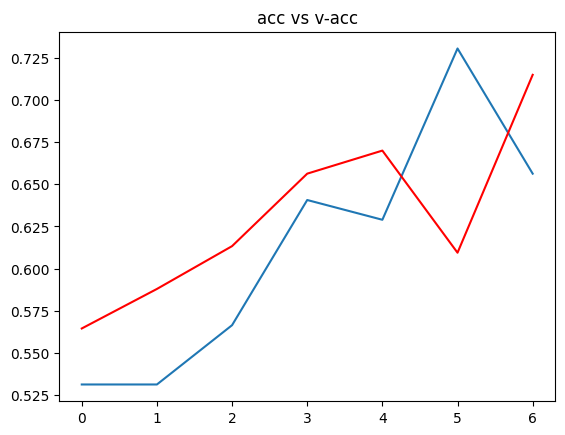

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("acc vs v-acc")
plt.show()

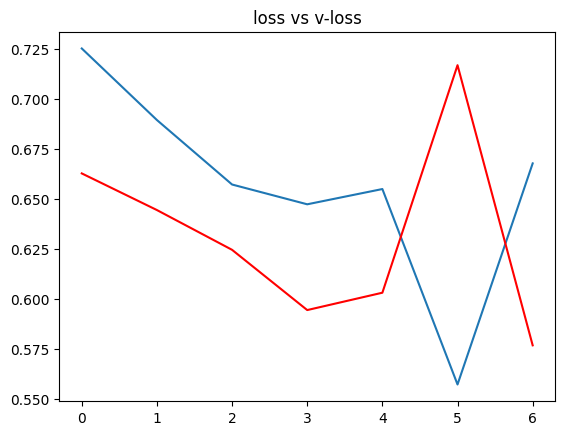

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title("loss vs v-loss")
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
# path for the image to see if it predicts correct class

path = input("Enter file path : ")
img = tf.keras.utils.load_img(path, target_size=(224,224), )

i = tf.keras.preprocessing.image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape
pred = (model.predict(input_arr) > 0.5).astype("int32")
print(pred)
if pred == 0 :
  print("The MRI image is of BRAIN TUMOR")
else :
  print("The MRI image is of Healthy brain")

Enter file path : /content/test/Healthey/Not Cancer  (37).jpg
1/1 [==============================] - 0s 239ms/step
[[1]]
The MRI image is of Healthy brain
